<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import urllib.parse
import urllib.request
import xml.etree.ElementTree as ET
import io
from bs4 import BeautifulSoup
import time
import sys
import multiprocessing as mp
import numpy as np

In [21]:
lcbo = pd.read_parquet('data/lcbo_productinfo.parquet')

/opt/tljh/user/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/opt/tljh/user/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/opt/tljh/user/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [22]:
lcbo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7360 entries, 1868 to 14323
Data columns (total 45 columns):
language               7360 non-null object
itemnumber             7360 non-null int64
itemname               7360 non-null object
price                  7360 non-null float64
productsize            7360 non-null int64
isdiscontinued         7360 non-null bool
islimited              7360 non-null bool
am                     7360 non-null bool
ambonusmiles           7360 non-null int64
amexpiration           101 non-null datetime64[ns]
kosher                 7360 non-null bool
lto                    7360 non-null bool
ltoexpiration          296 non-null datetime64[ns]
ltoregularprice        7360 non-null float64
ltosavings             7360 non-null float64
releasedate            929 non-null datetime64[ns]
upcnumber              7360 non-null int64
sccnumber              7360 non-null int64
vao                    7360 non-null bool
vaodescription         7360 non-null object
va

Let's see what unique values we have for each column

In [23]:
[print(column, lcbo[column].unique()) for column in lcbo.columns]

language ['en']
itemnumber [131870 133941 133958 139667 143339 144311 144329 164541 179308 180158
 181974 182931 186726 187047 189217 192732 192922 194878 195651 195834
 198259 200741 204560 205401 205666 205906 207126 207613 207639 207647
 207662 207670 208918 209205 210229 210252 211334 211730 214154 215038
 215558 215616 215624 215871 215889 216234 216226 216606 216671 216689
 216978 217042 217190 217638 217646 217687 217778 217786 217794 217802
 217836 217950 217984 217992 220749 220756 221200 224352 225565 226316
 230813 230987 231571 235119 236182 238097 241869 241943 241984 243824
 244186 245944 246603 247056 248997 249680 250357 250399 251371 251397
 252312 253658 254995 255232 255281 255349 256222 256230 258954 259333
 260752 261768 266015 266072 268101 268143 269563 269704 271106 272161
 272195 272302 272336 275933 276618 278423 280099 281824 285254 288233
 288563 288878 288886 289488 289496 291278 292615 292805 298083 298638
 305607 308155 311910 311928 311944 311936 311977 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [24]:
lcbo.describe()

,itemnumber,price,productsize,ambonusmiles,ltoregularprice,ltosavings,upcnumber,sccnumber,productquantity,alcoholpercentage,quantity
count,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7.360000e+03,7.360000e+03,7360.000000,7360.000000,7360.000000
mean,432190.264402,137.459096,785.049592,0.244701,1.724490,0.099504,2.150656e+12,1.091276e+13,1204.114674,43.399556,1.008696
std,137499.606676,437.939726,303.239666,2.167164,9.034513,0.565284,2.399812e+12,1.145114e+13,2322.091995,4.351621,0.115071
min,42.000000,8.550000,200.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,17.000000,1.000000
25%,334060.000000,45.150000,750.000000,0.000000,0.000000,0.000000,8.200076e+10,5.020009e+12,20.000000,40.000000,1.000000
50%,434092.000000,77.625000,750.000000,0.000000,0.000000,0.000000,7.384358e+11,1.008069e+13,201.000000,43.000000,1.000000
75%,524728.000000,109.950000,750.000000,0.000000,0.000000,0.000000,5.010509e+12,1.045554e+13,1540.000000,46.000000,1.000000
max,981381.000000,7450.000000,4500.000000,30.000000,99.700000,5.000000,8.902967e+12,8.501033e+13,26907.000000,65.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f505c4a2390>]],
      dtype=object)

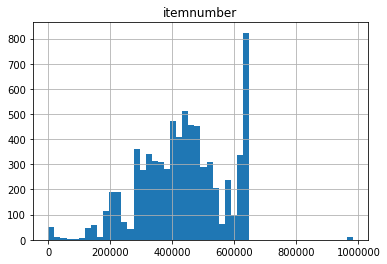

In [25]:
lcbo.hist(column = 'itemnumber', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5062261908>]],
      dtype=object)

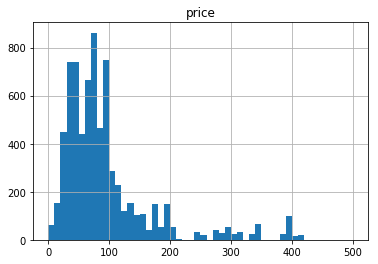

In [29]:
lcbo.hist(column = 'price', bins = 50, range=(0, 500))